### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

[]

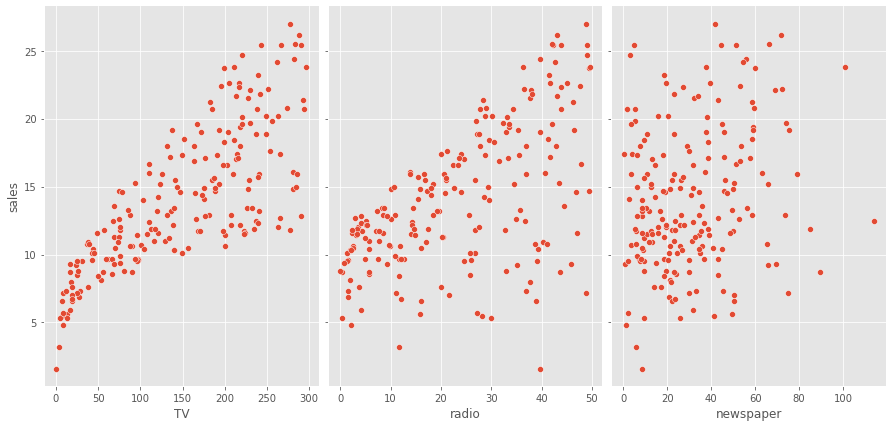

In [13]:
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', aspect = 0.7, height = 6)
plt.plot()

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [22]:
from sklearn.linear_model import LinearRegression

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

print(X.shape, y.shape)

(200, 3) (200,)


In [18]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594103


In [19]:
list(zip(['TV', 'radio', 'newspaper'], model.coef_))

[('TV', 0.045764645455397615),
 ('radio', 0.18853001691820437),
 ('newspaper', -0.0010374930424763007)]

        TV  radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


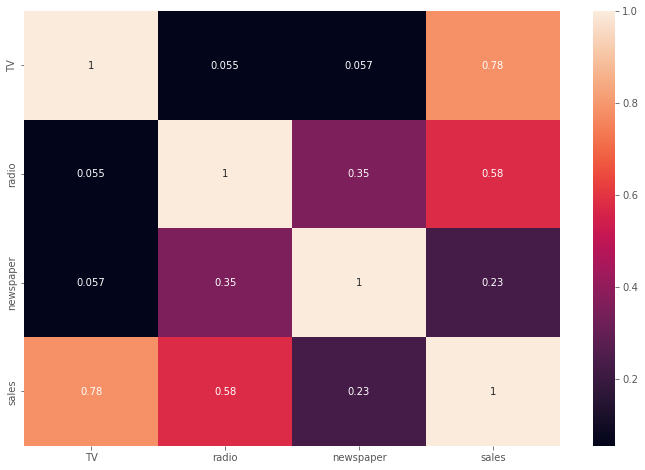

In [23]:
sns.heatmap(df.corr(), annot=True)

### Task 5: Feature Selection

In [27]:
from sklearn.metrics import r2_score
model = LinearRegression().fit(X[['TV', 'radio']], y)
model_pred = model.predict(X[['TV', 'radio']])
print("R2 Score is: {}".format(r2_score(y, model_pred)))

R2 Score is: 0.8971942610828956


In [30]:
model_2 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
model_pred_2 = model_2.predict(X[['TV', 'radio', 'newspaper']])
print("R2 Score is: {}".format(r2_score(y, model_pred_2)))


##This Conclude that inclusion of newspaper do not provide any significant information to predict Sales Value

R2 Score is: 0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

model = LinearRegression().fit(X_train, y_train)
model_predict = model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, model_predict))))
print("R2 score: {}".format(r2_score(y_test, model_predict)))

RMSE: 1.4113417558581587
R2 score: 0.8927605914615384


In [42]:
X = df[['TV', 'radio']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

model = LinearRegression().fit(X_train, y_train)
model_predict = model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, model_predict))))
print("R2 score: {}".format(r2_score(y_test, model_predict)))

RMSE: 1.3982924890777753
R2 score: 0.8947344950027066


['TV' 'radio']


C:\Users\hetht\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


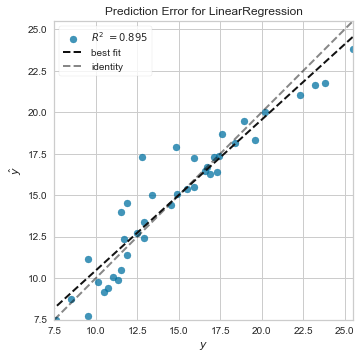

In [49]:
print(model.feature_names_in_)
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualiser = PredictionError(model).fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof();

### Task 7: Interaction Effect (Synergy)

In [51]:
df['interaction'] = df['TV'] * df['radio']
X = df[['TV', 'radio', 'interaction']]
y = df['sales']

X = df[['TV', 'radio', 'interaction']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

model = LinearRegression().fit(X_train, y_train)
model_predict = model.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, model_predict))))
print("R2 score: {}".format(r2_score(y_test, model_predict)))

RMSE: 0.5870420254600731
R2 score: 0.9814463903900935


C:\Users\hetht\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


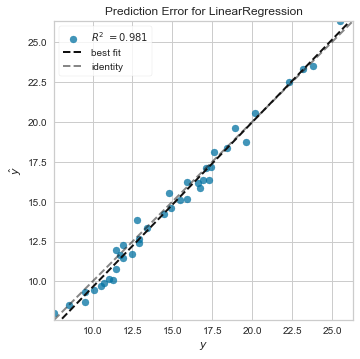

In [53]:
visualiser = PredictionError(model).fit(X_train, y_train)
visualiser.score(X_test, y_test)
visualiser.poof();